In [20]:
import pandas as pd
import seaborn as sns

filepath = 'C:\\Users\\Snapp-Kitchen\\Desktop\\data set paper.csv'
df = pd.read_csv(filepath)
filepath_1 = 'C:\\Users\\Snapp-Kitchen\\Desktop\\Graduate Project\\Supplemental_Spreadsheet dataset jadid.csv'
df_1 = pd.read_csv(filepath_1)
df = df.drop('NO.', axis = 1)
df['Sex,  Female/Male'] = df['Sex,  Female/Male'].map({'Male': 1, 'Female': 0})
df['Lateral/Bifurcation'] = df['Lateral/Bifurcation'].map({'Bifurcation': 1, 'Lateral': 0})
df['Regular/Irregular'] = df['Regular/Irregular'].map({'Regular': 1, 'Irregular': 0})
df['Stable Flow/Unstable Flow'] = df['Stable Flow/Unstable Flow'].map({'Stable': 1, 'Unstable': 0})
df['Simple Flow/Complex Flow'] = df['Simple Flow/Complex Flow'].map({'Simple': 1, 'Complex': 0})
site_mapping = {
    'L MCA': 1, 'L C7': 2, 'R MCA': 3, 'R C7 (1)': 4, 'R C7 (2)': 5,
    'R C7': 6, 'R C5': 7, 'L ACoA': 8, 'L C5': 9, 'R C6': 10,
    'L C4': 11, 'R C4': 12, 'L C6': 13, 'LC6': 14, 'R ACoA': 15,
    'BA': 16, 'L C4 (1)': 17, 'L C4 (2)': 18, 'L C6 ': 19,
    'L C7  ': 20, 'R ACA': 21, 'L ACA (1)': 22, 'L ACA (2)': 23,
    'R PCA': 24
}
df['Site'] = df['Site'].map(site_mapping)
df['Rupture, yes/no'] = df['Rupture, yes/no'].map({'yes': 1, 'no': 0})

df_1['Sex'] = df_1['Sex'].map({'male': 1, 'female': 0})
df_1['Unstable Flow Pattern'] = df_1['Unstable Flow Pattern'].map({'stable': 1, 'unstable': 0})
df_1['Complex Flow Pattern'] = df_1['Complex Flow Pattern'].map({'simple': 1, 'complex': 0})
df_1['Rupture Status'] = df_1['Rupture Status'].map({'ruptured': 1, 'unruptured': 0})
df_1['Irregular Shape'] = df_1['Irregular Shape'].map({'smooth': 1, 'irregular': 0})
location_mapping = {'ACA': 1, 'IC': 2, 'MCA': 3, 'VA, BA and PCA': 4}  
df_1['location_mapped'] = df_1['Location'].map(location_mapping)
df_1 = df_1.drop(columns='Location')
df_filtered = df_1[df_1['Aspect Ratio'] <= 3.5]
df_1 = df_filtered
df_filtered = df_1[df_1['Maximum Size'] <= 18.5]
df_1 = df_filtered
	

In [21]:
features = [
     'Irregular Shape', 'Complex Flow Pattern',
    'Aspect Ratio',  'Size Ratio', 'Maximum Size',
     'Unstable Flow Pattern', 'Low Shear Area Ratio',
    'Normalized Wall Shear Stress', 
    'Dome Area', 'Oscillatory Shear Index', 'location_mapped','Sex','Dome Volume'
] #from correlation
target = ['Rupture Status']


In [22]:
from sklearn.model_selection import train_test_split

df_shuffled = df_1.sample(frac=1, random_state=42)  


train, test = train_test_split(df_shuffled, test_size=0.2, random_state=42)
x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


best_params = {
    'colsample_bytree': 1.0,
    'gamma': 0,
    'learning_rate': 0.1,
    'max_depth': 8,
    'min_child_weight': 1,
    'n_estimators': 500,
    'scale_pos_weight': 2,
    'subsample': 0.8
}


best_xgb = XGBClassifier(**best_params)


best_xgb.fit(x_train, y_train)


y_pred = best_xgb.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7777777777777778

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        20
           1       0.76      0.88      0.81        25

    accuracy                           0.78        45
   macro avg       0.79      0.77      0.77        45
weighted avg       0.78      0.78      0.77        45


Confusion Matrix:
[[13  7]
 [ 3 22]]


In [24]:

feature_importances = best_xgb.feature_importances_
feature_names = x_train.columns  

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
                         Feature  Importance
0                Irregular Shape    0.217184
1           Complex Flow Pattern    0.141738
11                           Sex    0.102605
6           Low Shear Area Ratio    0.084844
2                   Aspect Ratio    0.076058
3                     Size Ratio    0.066863
8                      Dome Area    0.061147
9        Oscillatory Shear Index    0.055182
12                   Dome Volume    0.046929
5          Unstable Flow Pattern    0.041709
7   Normalized Wall Shear Stress    0.040217
4                   Maximum Size    0.036255
10               location_mapped    0.029268


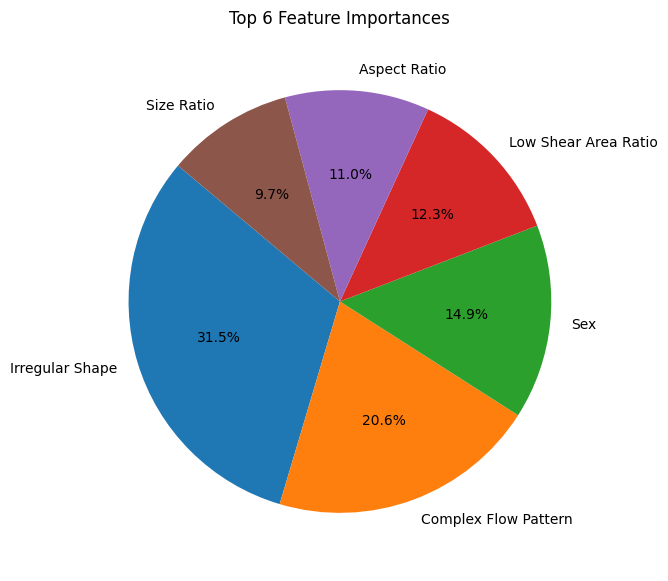

In [30]:
import matplotlib.pyplot as plt


top_features = feature_importance_df.head(6)
feature_names = top_features['Feature']
importances = top_features['Importance']

# Plotting the pie chart
plt.figure(figsize=(6, 7))
plt.pie(importances, labels=feature_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Top 6 Feature Importances')
plt.show()


tune az tarigh gridsearch